消融研究实验

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 构建字典
path_pair = {
    'NYCBike1/MoESoft-layers-num': 'layers-num',
    'NYCBike1/MoESoft-layers-type': 'layers-order',
    'METRLA/MoESoft-ablation-STSTST': 'ablation-metrla',
    'NYCTaxi/Ablation': 'ablation-nyctaxi'
}
path, title = list(path_pair.items())[3]  # 通过索引直接获取第二个条目

file_path = f'./{path}/results.csv'
fig_title = f'{path}'
data = pd.read_csv(file_path)

# 去除列名中的空格
data.columns = data.columns.str.strip()
# 将分类名提取为列表
variants = data['Category'].tolist()
variants

['STGormer', 'w/o\\ t_{in}', 'w/o\\ s_{in}', 'w/o\\ SA_{bias}', 'w/o\\ STMoE']

In [2]:
mae_list = []
rmse_list = []
mape_list = []
for index, row in data.iterrows():
    mae_list.append(row['MAE'])
    rmse_list.append(row['RMSE'])
    mape_list.append(float(row['MAPE'].strip().rstrip('%')))

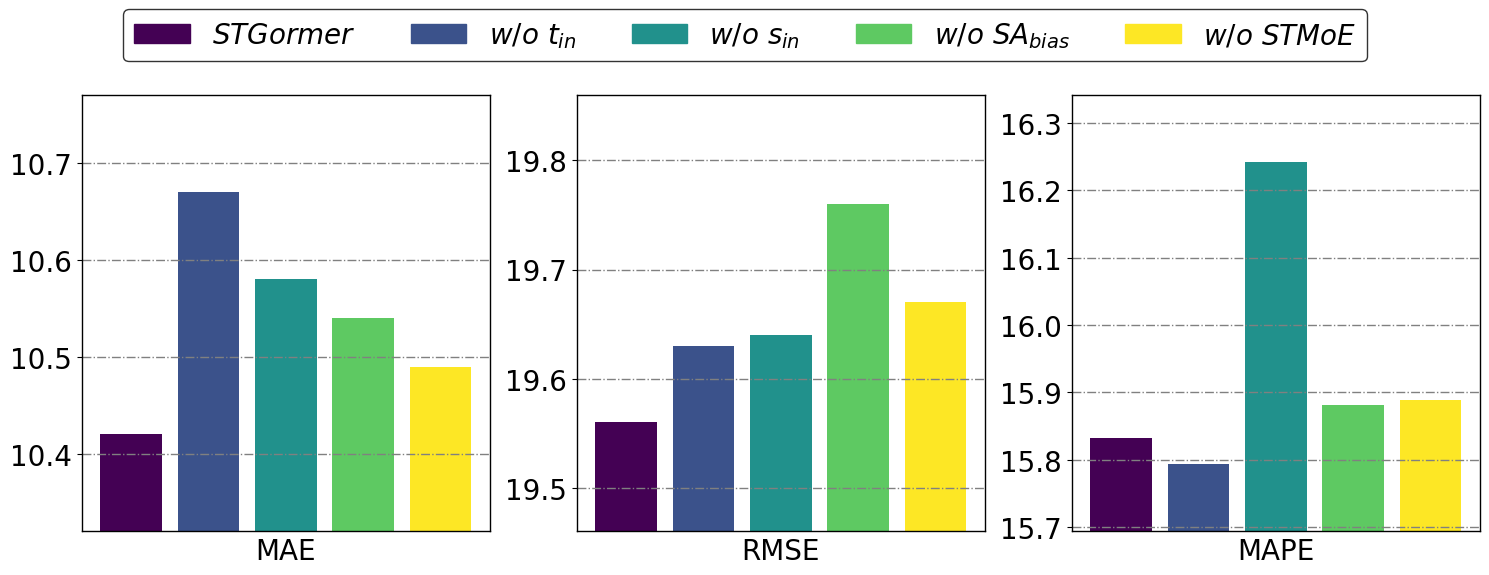

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

font_size = 20
alpha = 1.0
# Existing color scheme with tab10
cmap_tab10 = plt.get_cmap('tab10')
colors_tab10 = {variant: cmap_tab10(i) for i, variant in enumerate(variants)}
# Define a second color scheme using a sequential colormap
cmap_seq = plt.get_cmap('viridis')  # PuOr viridis plasma inferno magma cividis Set3
colors_seq = {variant: cmap_seq(np.linspace(0, 1, len(variants))[i]) for i, variant in enumerate(variants)}
colors=colors_seq
# 画条形图
for i, metric in enumerate([mae_list, rmse_list, mape_list]):
    axs[i].grid(True, linestyle='-.', linewidth=1.0, color='gray', axis='y', zorder=0)
    axs[i].bar(variants, metric, color=[colors[v] for v in variants], alpha=alpha, zorder=1)
    axs[i].set_xlabel(['MAE', 'RMSE', 'MAPE'][i], fontsize=font_size)
    axs[i].tick_params(axis='x', length=0)
    axs[i].set_xticks([])
    axs[i].tick_params(axis='y', labelsize=font_size)
    axs[i].set_ylim([min(metric) - 0.1, max(metric) + 0.1])
    # 设置图表外框线加粗
    for axis in ['top','bottom','left','right']:
        axs[i].spines[axis].set_linewidth(1.0)

legend_labels = [f'${v}$' for v in variants]
handles = [plt.Rectangle((0,0),1,1, color=colors[v], alpha=alpha) for v in variants]
# 美化图例框
legend = fig.legend(handles, legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.01), fontsize=font_size, ncol=len(variants), frameon=True)
legend.get_frame().set_edgecolor('black')  # 设置图例边框颜色
legend.get_frame().set_linewidth(1.0)  # 设置图例边框宽度

plt.tight_layout()
plt.savefig(f'{title}.pdf', format='pdf', bbox_inches='tight')
# plt.show()